In [2]:
import numpy as np
import matplotlib.pyplot as plt

Triangle 2 and triangle 1 have the intersection area of 0.0


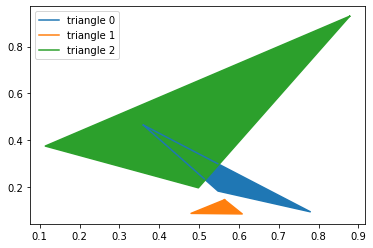

In [89]:
# defining triangles

number_of_triangles = 3

x_points = np.random.rand(number_of_triangles, 3)
y_points = np.random.rand(number_of_triangles, 3)

x_points = np.array([np.append(cur_points, cur_points[0]) for cur_points in x_points])
y_points = np.array([np.append(cur_points, cur_points[0]) for cur_points in y_points])

index_first = np.random.randint(number_of_triangles)
index_second = np.random.randint(number_of_triangles)

while index_first == index_second:
    index_second = np.random.randint(number_of_triangles)

# finding points where the lines intersect
    
equations_left = np.array([[[y_points[index_first][i] - y_points[index_first][i + 1], \
                             x_points[index_first][i + 1] - x_points[index_first][i]] \
                            for i in range(3)], \
                           [[y_points[index_second][j] - y_points[index_second][j + 1], \
                             x_points[index_second][j + 1] - x_points[index_second][j]] \
                            for j in range(3)]])

equations_right = np.array([[x_points[index_first][i + 1] * y_points[index_first][i] - \
                             x_points[index_first][i] * y_points[index_first][i + 1] \
                            for i in range(3)], \
                           [x_points[index_second][j + 1] * y_points[index_second][j] - \
                             x_points[index_second][j] * y_points[index_second][j + 1] \
                            for j in range(3)]])

intersection_points = np.array([np.linalg.solve([equations_left[0][i], equations_left[1][j]], \
                                                [equations_right[0][i], equations_right[1][j]]) \
                                for i in range(3) for j in range(3)])

# filtering points that aren't inside line segments (sides of triangles)

mask = np.ones(9, dtype=bool)

for index, (x, y) in enumerate(intersection_points):    
    end_first_left = min(x_points[index_first][index // 3], x_points[index_first][index // 3 + 1])
    end_first_right = max(x_points[index_first][index // 3], x_points[index_first][index // 3 + 1])
    end_second_left = min(x_points[index_second][index % 3], x_points[index_second][index % 3 + 1])
    end_second_right = max(x_points[index_second][index % 3], x_points[index_second][index % 3 + 1])
    
    if not (end_first_left <= x <= end_first_right and end_second_left <= x <= end_second_right):
        mask[index] = False
        
intersection_points = intersection_points[mask]

# adding vertices that are inside a triangle



# sorting the points

if len(intersection_points) >= 3:
    center = np.array([np.array([point[0] for point in intersection_points]).mean(), \
                       np.array([point[1] for point in intersection_points]).mean()])

    arctans = np.array([np.arctan2(intersection_points[i][1] - center[1], \
                                   intersection_points[i][0] - center[0]) \
                        for i in range(len(intersection_points))])

    intersection_points = intersection_points[np.argsort(arctans)]   
    intersection_points = np.append(intersection_points, [intersection_points[0]], axis=0)

# calculating the area

x_coords = [point[0] for point in intersection_points]
y_coords = [point[1] for point in intersection_points]
area = 0.5 * np.abs(np.dot(x_coords, np.roll(y_coords, 1)) - np.dot(y_coords, np.roll(x_coords, 1)))

# output

ax = plt.gca()
   
for index, (x_points, y_points) in enumerate(zip(x_points, y_points)):
    plt.plot(x_points, y_points, label=f'triangle {index}')
    ax.fill(x_points, y_points)
    
plt.legend()

if len(intersection_points) >= 3:
    plt.plot([point[0] for point in intersection_points], \
             [point[1] for point in intersection_points])
    
    ax.fill([point[0] for point in intersection_points], \
             [point[1] for point in intersection_points])
    
print(f'Triangle {index_first} and triangle {index_second} have the intersection area of {area}')